# Homework 2 - Machine Learning Pipeline EDA
#### Author: Kunyu He, CAPP'20

In [1]:
import os
os.chdir("..")

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import viz

In [3]:
INPUT_DIR = "./clean_data/"
NON_NUMERIC = ["PersonID", "zipcode", "SeriousDlqin2yrs"]

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

## 1. Load Data

Load data into our working environment.

In [5]:
data = viz.read_clean_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41016 entries, 0 to 41015
Data columns (total 13 columns):
PersonID                                41016 non-null int64
SeriousDlqin2yrs                        41016 non-null int32
RevolvingUtilizationOfUnsecuredLines    41016 non-null float64
age                                     41016 non-null int32
zipcode                                 41016 non-null object
NumberOfTime30-59DaysPastDueNotWorse    41016 non-null int32
DebtRatio                               41016 non-null float64
MonthlyIncome                           41016 non-null float64
NumberOfOpenCreditLinesAndLoans         41016 non-null int32
NumberOfTimes90DaysLate                 41016 non-null int32
NumberRealEstateLoansOrLines            41016 non-null int32
NumberOfTime60-89DaysPastDueNotWorse    41016 non-null int32
NumberOfDependents                      41016 non-null int32
dtypes: float64(3), int32(8), int64(1), object(1)
memory usage: 2.8+ MB


Extract numeric columns and target variable from the data set.

In [6]:
numerics = data[[col for col in data.columns if col not in NON_NUMERIC]]
target = data.SeriousDlqin2yrs

## 2. EDA

### 2.1 Categorical Variables - Bar Charts

First check the frequencies of two discrete variables `SeriousDlqin2yrs` and `zipcode`.

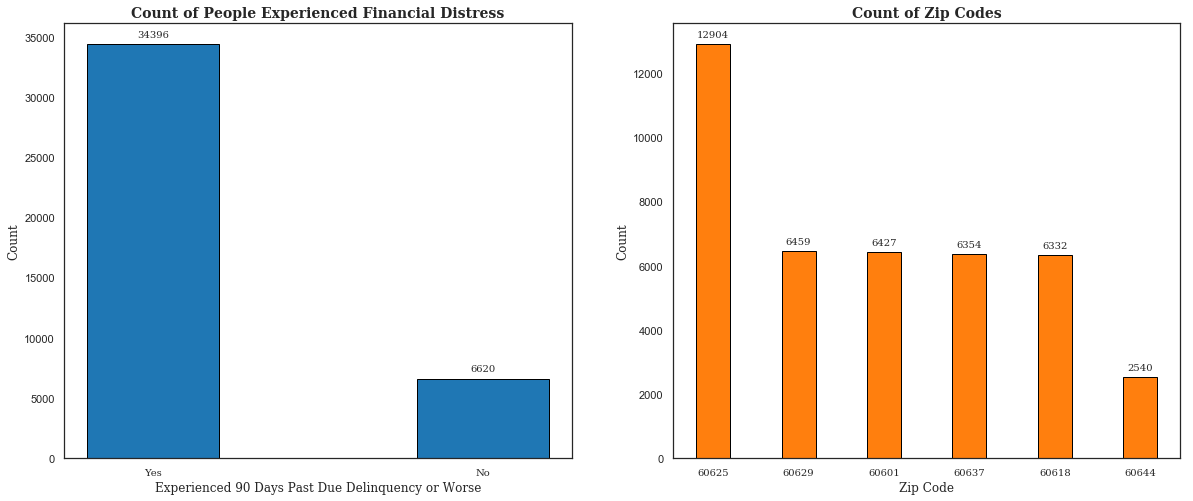

In [7]:
fig = plt.figure(figsize=[20, 8])
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


viz.bar_plot(ax0, target.value_counts(), "#1f77b4", sub=False,
             plot_title="Count of People Experienced Financial Distress",
             xlabel="Experienced 90 Days Past Due Delinquency or Worse",
             ylabel="Count", x_ticks=["Yes", "No"])

viz.bar_plot(ax1, data.zipcode.value_counts(), "#ff7f0e", sub=False,
             plot_title="Count of Zip Codes",
             xlabel="Zip Code", ylabel="Count")


We can see that in our sample, over 80% of observations have experienced 90 days past due delinquency or worse. And number of observations from zip code 60625 is much higher than the average, while that of observations from zip code 60644 is much lower than the average.

### 2.2 Numeric Variables - Histograms

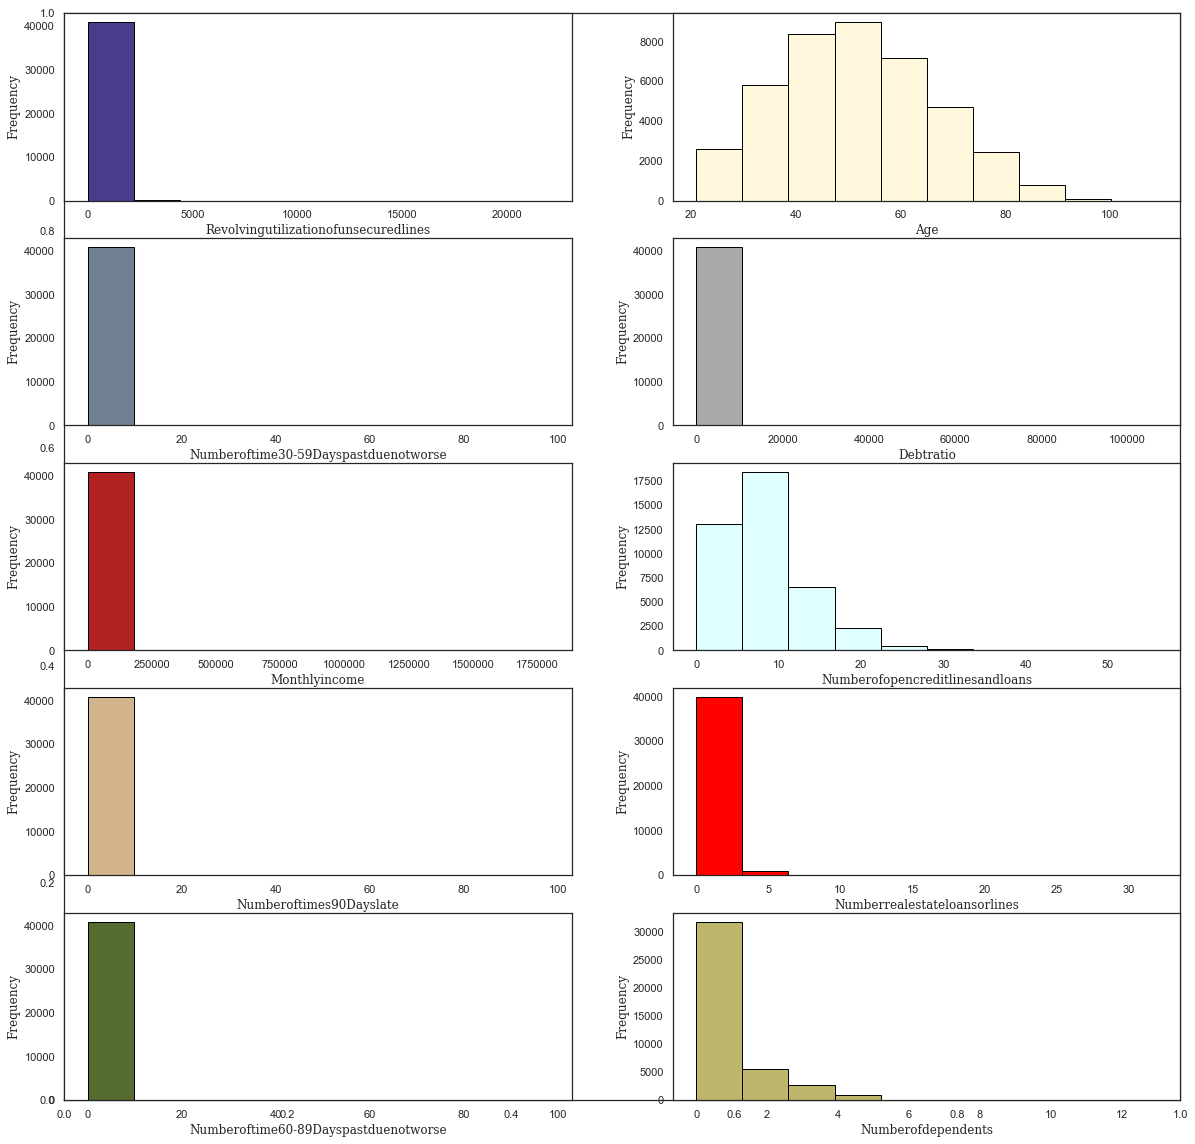

In [8]:
viz.hist_panel(numerics)

Above shows distributions of the numerical variables. We can see that for variables where some observations take extremely large values, it's hard to describe their distribution in detail. So we limit the x-axis in the range of minimum to 95% quantile for better visualization below.

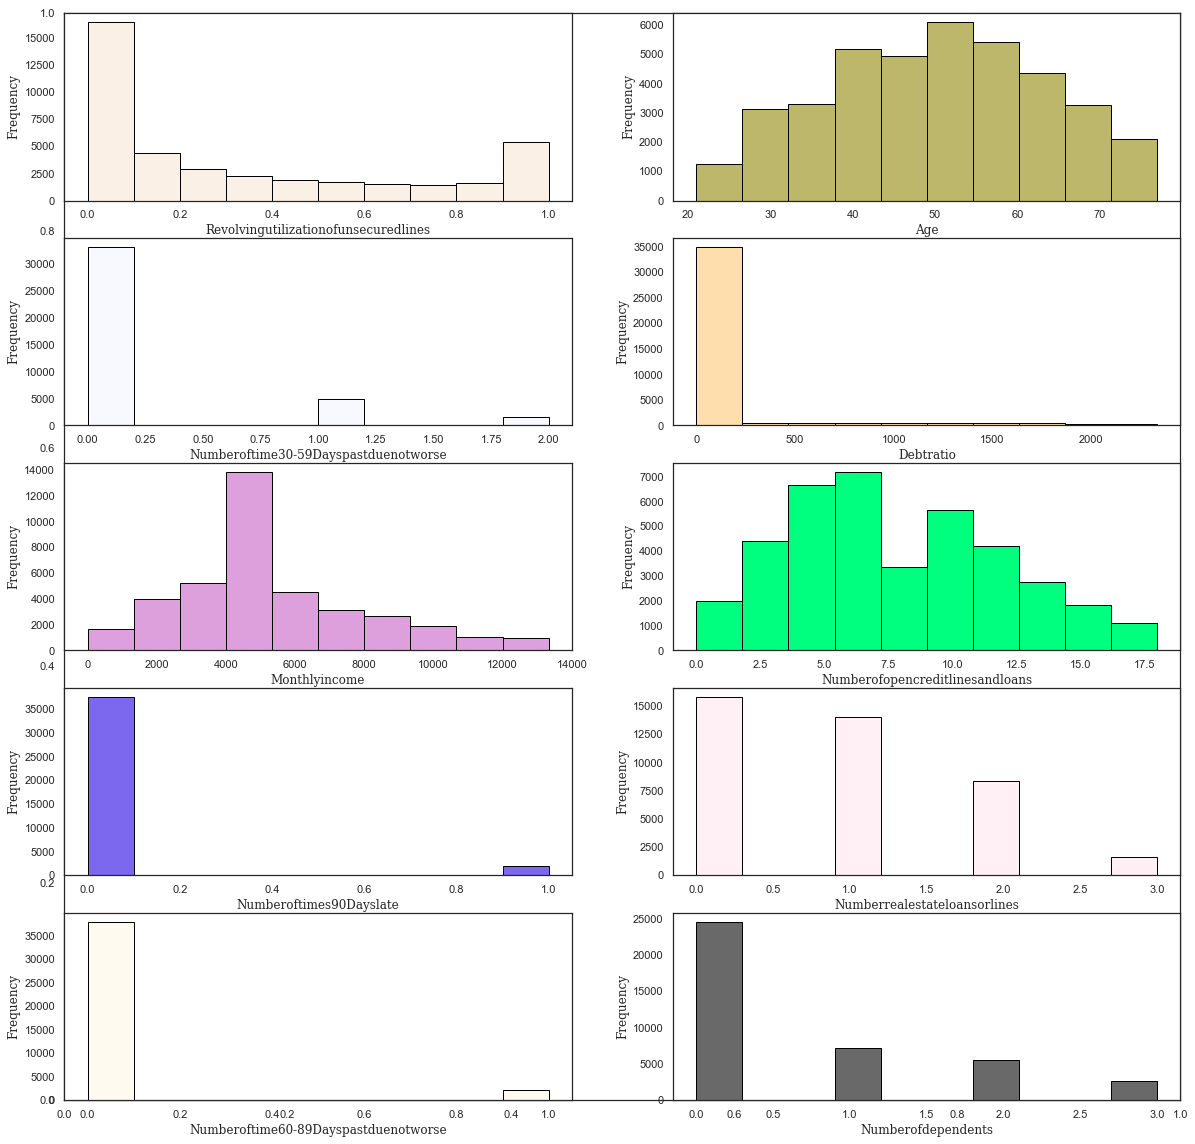

In [9]:
viz.hist_panel(numerics, cut=True)

## Correlations Matrix

In [10]:
nvt = pd.concat([target, numerics], axis=1)

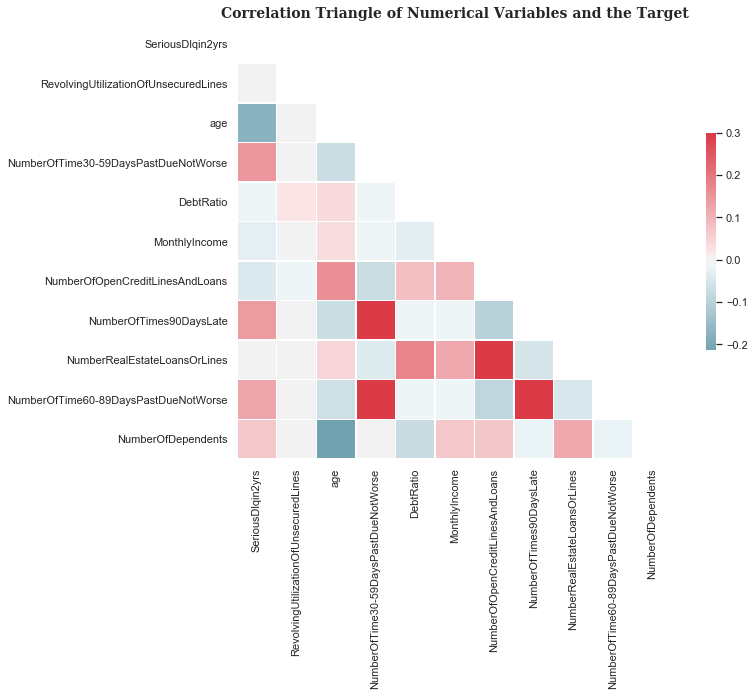

In [11]:
viz.corr_triangle(nvt, plot_title="Correlation Triangle of Numerical Variables and the Target")

We can see here our target, `SeriousDlqin2yrs`, is relatively positively correlated with **number of times borrower has been 30-59, 60-89, and 90+ days past due in the last 2 years** and **number of dependents in family excluding themselves**, and it's negatively correlated with **age**.

There are also other interesting findings that **number of times borrower go past due in the last 2 years are relatively strongly and positively correlated**. The positive correlations between **number of open loans and Lines of credit and number of mortgage and real estate loans including home equity lines of credit**, and the negative correlation between **age and number of dependents in family** excluding themselves are pretty strong.